# Importing Necessary Libraries

Here, importing all the libraries necessary for our data analysis and machine learning tasks. Such are: libraries for data manipulation-pandas; Numerical operations and array handling- numpy;text manipulation- Natural Language Toolkit (nltk); Data visualization Matplotlib- seaborn; machine learning models- sklearn; Lemmatization for reducing words to their base form

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer


# 1: Project Overview
People express a range of sentiments using various words, especially on online social media platforms. Psychological studies indicate that sentiments and emotions exist on a broad spectrum and can be categorized into different taxonomies. In this project,  we are asked to predict the sentiment of Twitter content, which is simplified to either *positive* or *negative*.

# 2: Data Loading and Initial Setup
Here, configuring the environment to display a sufficient number of rows for data examination. Besides, mount the Google Drive to access the project dataset and load it into a pandas DataFrame for subsequent analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# maximum number of rows pandas display= 100; for better dataframe visibility
pd.set_option('display.max_rows', 100)

# Define the path to the dataset stored on Google Drive
development_data = '/content/drive/MyDrive/development.csv'
evaluation_data = '/content/drive/MyDrive/evaluation.csv'

# Load the dataset from the CSV file into a pandas DataFrame
df = pd.read_csv(development_data)
df_eval= pd.read_csv(evaluation_data)
# Display the first five rows of the dataframe to verify it loaded correctly
df.head(5)

,sentiment,ids,date,flag,user,text
0,1,1995592655,Mon Jun 01 13:44:19 PDT 2009,NO_QUERY,carlincomm,@krclaypool Sure I'd be glad to! http://bit.l...
1,0,1992268865,Mon Jun 01 08:28:41 PDT 2009,NO_QUERY,FootyGirl88,"I still can't find my phone, I NEED that phone..."
2,1,2047074239,Fri Jun 05 13:06:42 PDT 2009,NO_QUERY,fryfan20,"Have taken a shower, didn't calm but did clean..."
3,1,1976075552,Sat May 30 16:31:55 PDT 2009,NO_QUERY,luvinmesomed,@JKDW4ever OMG!! those were great!!! I freakin...
4,0,1981978321,Sun May 31 10:16:44 PDT 2009,NO_QUERY,babybunny1987,@EvoOba noooo chinese foot it was closed.but ...


#3. Data Preprocessing
This section prepares text data for sentiment analysis by initializing stopwords and a lemmatizer, then applying a function to clean the text—removing URLs, punctuation, and stopwords while lemmatizing. It drops irrelevant columns and ensures the sentiment labels are in integer format, ready for model training.

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Drop irrelevant columns
df=df.drop(['date', 'flag', 'user'], axis=1)
#evaluation_data = df_eval.drop(['date', 'flag', 'user'], axis=1)

# Preprocess the text column
df['text'] = df['text'].apply(preprocess_text)
df_eval['text'] = df_eval['text'].apply(preprocess_text)

# Ensure sentiment labels are in the correct format
df['sentiment'] = df['sentiment'].astype(int)

In [ ]:
df.head(5)

,sentiment,ids,text
0,1,1995592655,krclaypool sure id glad sale page blog
1,0,1992268865,still cant find phone need phone well phone me...
2,1,2047074239,taken shower didnt calm clean
3,1,1976075552,jkdw4ever omg great freakin die see huge as gr...
4,0,1981978321,evooba noooo chinese foot closedbut bought kebab


In [ ]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179995 entries, 0 to 179994
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  179995 non-null  int64 
 1   ids        179995 non-null  int64 
 2   text       179995 non-null  object
dtypes: int64(2), object(1)
memory usage: 4.1+ MB


#A. Feature Engineering
In this part of data-preprocessing, transforming text into numerical features using TF-IDF, selecting the 1,500 most relevant words.
Next, for a good understanding enriched the DataFrame `df` by adding features like `word_count`, `char_count`, `avg_word_length`, and . It also computes a sentiment score using the Afinn lexicon `afinn_sentiment`, which is stored in new columns.

In [ ]:
tdf_idf_vectorizer=TfidfVectorizer(max_features=1500)

In [ ]:
# Add word count feature
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Add character count feature
df['char_count'] = df['text'].apply(lambda x: len(x))

# Add average word length feature
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=a615de1fc86e8e0978418c63a88f572b77875e99a8fdea515d12f02666a6f4d2
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from afinn import Afinn

# Initialize Afinn
afinn = Afinn()

# Adding positive and negative word sentiment score feature
df['afinn_sentiment'] = df['text'].apply(lambda x: afinn.score(x))
df.head(2)

,sentiment,ids,text,word_count,char_count,avg_word_length,afinn_sentiment
0,1,1995592655,krclaypool sure id glad sale page blog,7,38,4.571429,3.0
1,0,1992268865,still cant find phone need phone well phone me...,10,55,4.600000,0.0


#B. Statistical and visual analysis of sentiment data


Sentiment Distribution: This visualization illustrates the proportion of positive and negative sentiments within the dataset. Assessing the overall sentiment balance and detecting any imbalances that could impact model performance.



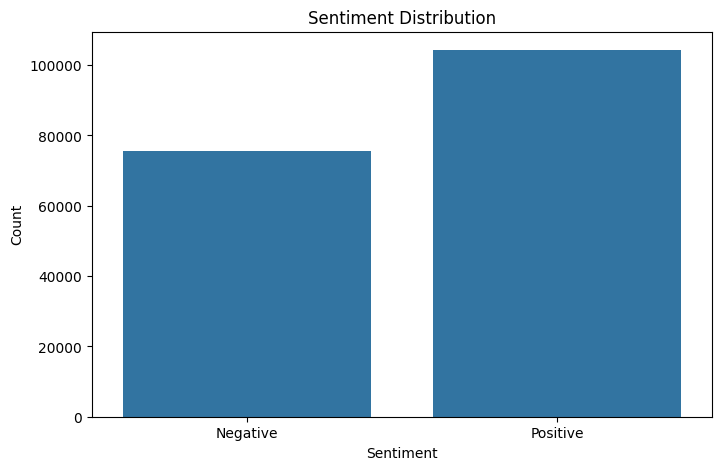

In [ ]:
# Plotting sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

Word Cloud: This graphic highlights the most common words linked to positive-negative sentiments. showcases key terms, offering insights and connections into the language used in.

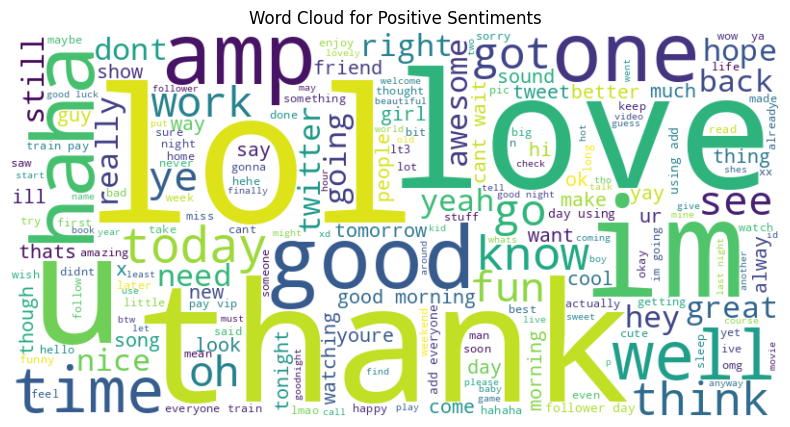

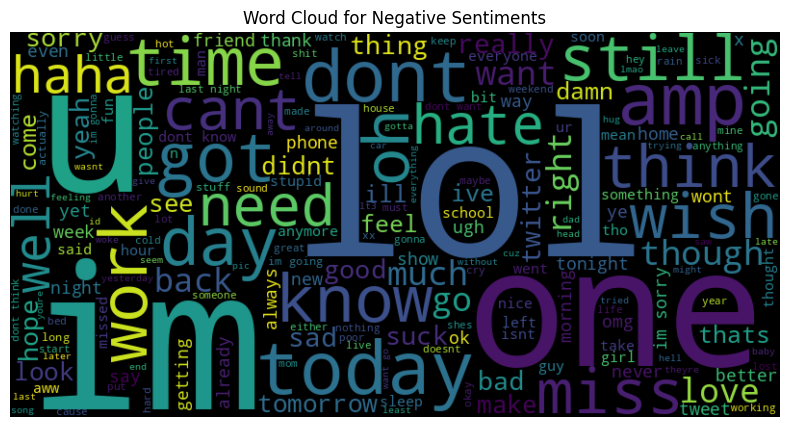

In [ ]:
from wordcloud import WordCloud

# word cloud for positive sentiments
positive_text = ' '.join(df[df['sentiment'] == 1]['text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plotting the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

# word cloud for negative sentiments
negative_text = ' '.join(df[df['sentiment'] == 0]['text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plotting the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

Correlation Heatmap: Displays the relationships among numeric features in the dataset, including text length features and sentiment scores. Showing how various features might affect sentiment classification.

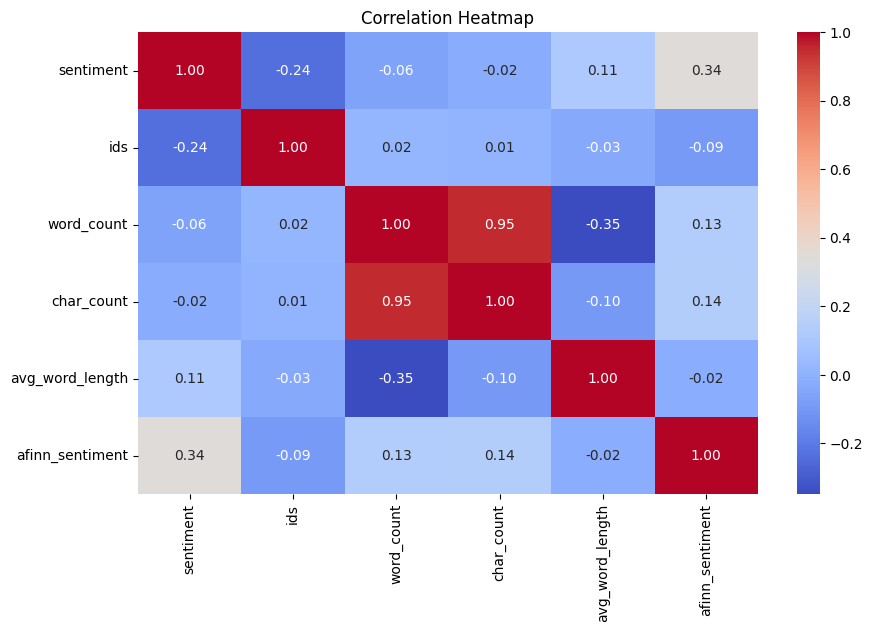

In [ ]:
#only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
# Calculating correlations
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#4. Model Development
for the model setup, divided the dataset into training and evaluation sets, then trained a classification pipeline using an MLPClassifier with TF-IDF vectorization. It makes predictions on the evaluation set and computes the F1 macro score to evaluate model performance.

In [ ]:
# Splitting the data into training and evaluation sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

Setting up MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

# Defining TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

#the pipeline with MLPClassifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                                       solver='adam', alpha=0.0001, batch_size='auto', random_state=42,
                                       verbose=True, early_stopping=True))
])

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# predicting on the evaluation set (X_test)
y_pred = pipeline.predict(X_test)

# Calculating the F1 macro score
f1_macro = f1_score(y_test, y_pred, average='macro')

# Print F1 macro score
print(f'F1 Macro Score: {f1_macro:.4f}')

# print detailed classification report
# print(classification_report(y_test, y_pred))

Iteration 1, loss = 0.50999619
Validation score: 0.773611
Iteration 2, loss = 0.35324250
Validation score: 0.766319
Iteration 3, loss = 0.25542160
Validation score: 0.752708
Iteration 4, loss = 0.19826034
Validation score: 0.748819
Iteration 5, loss = 0.16467899
Validation score: 0.743264
Iteration 6, loss = 0.14039038
Validation score: 0.740208
Iteration 7, loss = 0.12196132
Validation score: 0.742361
Iteration 8, loss = 0.10515795
Validation score: 0.740556
Iteration 9, loss = 0.09070055
Validation score: 0.739653
Iteration 10, loss = 0.07780618
Validation score: 0.738819
Iteration 11, loss = 0.06604178
Validation score: 0.739653
Iteration 12, loss = 0.05605676
Validation score: 0.733750
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
F1 Macro Score: 0.7724


In [ ]:
y_pred = np.round(y_pred).astype(int)

# Calculate accuracy
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1_macro:.4f}')

F1 Score: 0.7724


In the below part, here it tune hyperparameters for an MLPClassifier using GridSearchCV with 3-fold cross-validation. It identifies the best parameters, uses the optimal model to predict sentiments on the evaluation set, calculates the F1 macro score, and displays a classification report detailing precision, recall, and F1 scores for each class.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, classification_report

# Only the most important parameters for tuning
param_grid = {
    'clf__hidden_layer_sizes': [(100,), (50,)],
    'clf__activation': ['relu'],
    'clf__alpha': [0.0001],
    'clf__learning_rate': ['constant', 'adaptive'],
    'clf__batch_size': ['auto']
}

# Perform GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Using the best model to make predictions on the evaluation set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calculate F1 macro score with the best model
f1_macro = f1_score(y_test, y_pred_best, average='macro')

# F1 macro score
print(f'F1 Macro Score: {f1_macro:.4f}')

# printing classification report
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Iteration 1, loss = 0.50999619
Validation score: 0.773611
Iteration 2, loss = 0.35324250
Validation score: 0.766319
Iteration 3, loss = 0.25542160
Validation score: 0.752708
Iteration 4, loss = 0.19826034
Validation score: 0.748819
Iteration 5, loss = 0.16467899
Validation score: 0.743264
Iteration 6, loss = 0.14039038
Validation score: 0.740208
Iteration 7, loss = 0.12196132
Validation score: 0.742361
Iteration 8, loss = 0.10515795
Validation score: 0.740556
Iteration 9, loss = 0.09070055
Validation score: 0.739653
Iteration 10, loss = 0.07780618
Validation score: 0.738819
Iteration 11, loss = 0.06604178
Validation score: 0.739653
Iteration 12, loss = 0.05605676
Validation score: 0.733750
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Best Parameters: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__batch_size': 'auto', 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate

#5. Model Evaluation
In this sections, evaluated the model on new dataset- a key aspect of practical applicability. After that generating the final CSV file for submission and evaluation.

In [ ]:
# Predict on the evaluation dataset
y_eval = pipeline.predict(df_eval['text'])

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
submission = pd.DataFrame({'Id':df_eval['ids'],'Predicted':y_eval})
submission.to_csv('/content/drive/MyDrive/submissionDSLmainf.csv',index=False,header=True)

#A. Visualization

Confusion Matrix: providing insights into how well the chosen model predicts each sentiment class.

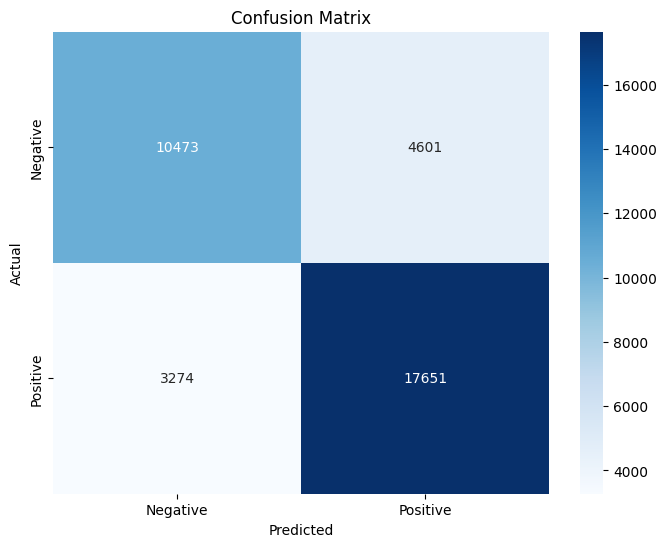

In [ ]:
from sklearn.metrics import confusion_matrix
#confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Precision-Recall Curve: shows and plotting the precision and recall at different thresholds,besides the average precision score for a comprehensive understanding of model performance.

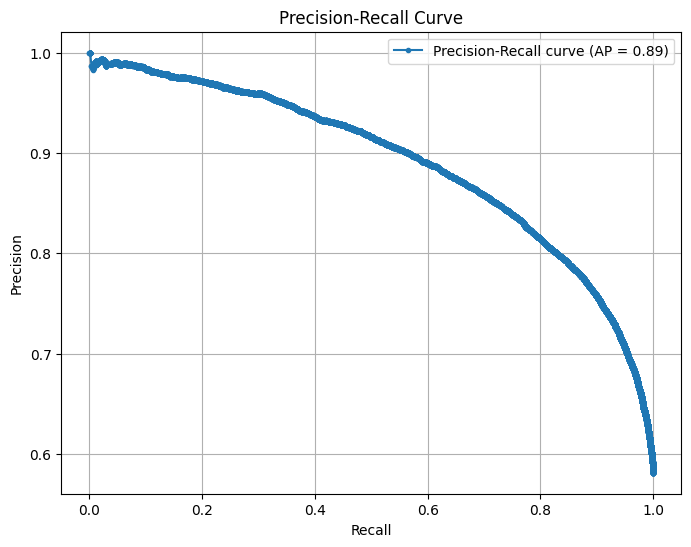

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculating precision, recall, and thresholds
y_scores = best_model.predict_proba(X_test)[:, 1]  # Getting probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# average precision score
avg_precision = average_precision_score(y_test, y_scores)

# the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve (AP = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()